## Exploring simulated data files from LDMX

In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [8]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_May10_ntuple/*.root")

In [9]:
# let's define a couple of histograms
# each .Bin defines a new axis of the histogram

hists = {}
hists["Target_kdau1_hist"] = hist.Hist("Target SP Kaons",
                                #hist.Cat("Ktype", "Type of Kaon"),        
                                hist.Bin("pz1", r"$p_z$ [MeV]", 40, 0, 3000),
                                hist.Bin("e1", r"Energy [MeV]", 40, 0, 3000),
                            )

hists["Target_kdau2_hist"] = hist.Hist("Target SP Kaons", 
                                #hist.Cat("Ktype", "Type of Kaon"),        
                                hist.Bin("e2", r"Electron Energy [MeV]", 40, 0, 4000),
                                hist.Bin("pz2", r"Photon Energy [MeV]", 40, 0, 4000),
                            )



In [10]:

def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon_dau1 = ldmx_events['Target_Kaon_dau1']
    target_kaon_dau2 = ldmx_events['Target_Kaon_dau2']
    
    
    #target_kaon = add_angle(target_kaon)
    
    #target_kaon_dau1 = ldmx_events['Target_Kaon_dau1']
    #target_kaon_dau1 = add_angle(target_kaon_dau1)
    
    masks_id = {'Kshort': 310,
                'Klong': 130,
                'Kpm': 321,
               }
    masses = {'Kshort': 497.648,
              'Klong': 497.648,
              'Kpm': 493.677
             }
    
    def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x
        
    for part,pmask in masks_id.items():
        part_mask1p = (abs(target_kaon_dau1.pdgID)==pmask)
        part_mask2p = (abs(target_kaon_dau2.pdgID)==pmask)
        hists["Target_kdau1_hist"].fill(
                                 #Ktype=part,
                                 e1=flat(target_kaon_dau1.e),
                                 pz1=flat(target_kaon_dau1.pz),
                                )
    
        hists["Target_kdau2_hist"].fill(
                                 #Ktype=part,
                                 e2=flat(target_kaon_dau2.e),
                                 pz2=flat(target_kaon_dau2.pz),
                                )

In [11]:
nchunk = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)

process 1
process 2
process 3
process 4
process 5
process 6
process 7
process 8
process 9
process 10


<Hist (pz1,e1) instance at 0x12f88aa00>


/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


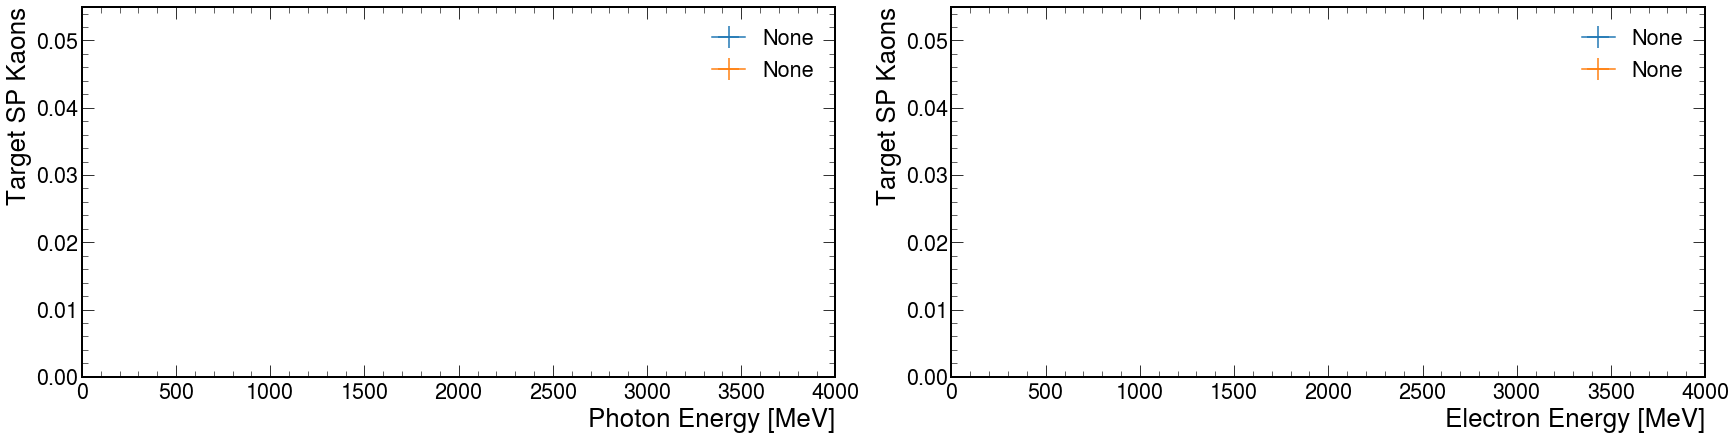

In [14]:
print(hists["Target_kdau1_hist"])
fig, ax = plt.subplots(1,2,figsize=(24,6), constrained_layout=True)
hist.plot1d(hists["Target_kdau1_hist"].sum('e1'),ax=ax[0],clear=False);
hist.plot1d(hists["Target_kdau2_hist"].sum('e2'),ax=ax[0],clear=False);


hist.plot1d(hists["Target_kdau1_hist"].sum('pz1'),ax=ax[1],clear=False);
hist.plot1d(hists["Target_kdau2_hist"].sum('pz2'),ax=ax[1],clear=False);
#leg = ax.legend([r'$e^-$',r'$\gamma$',r'$K$'])